# Data preprocessing in pandas

pandas.**DataFrame** reference:  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

### 1. Import necessary packages

In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Download Adult dataset
Follow the link and download the Adult dataset:  
https://archive.ics.uci.edu/ml/datasets/Adult

Next, load it from file into pandas.**DataFrame**. Docs:  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

*Hint*: look carefully at the raw data, especially at the delimiters. Inspect pandas.**read_csv** options and find out how to handle this.

In [48]:
DATA_DIR = 'data'
FILE_NAME = 'adult.data.csv'

file_path = os.path.join(DATA_DIR, FILE_NAME)

In [49]:
df = pd.read_csv(file_path, header=None, skipinitialspace=True)

### 3. Set DataFrame column labels
Dataset description:  
https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names

Docs:  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.columns.html

In [50]:
# df.columns = None

In [51]:
df.columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race',
    'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
]

### 4. Get DataFrame dimensions
DataFrame dimensions are numbers of records and attributes. See docs:  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html

In [52]:
df.shape

(32561, 15)

### 5. Print out first and last 5 rows of the DataFrame
See docs:  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html

In [53]:
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [54]:
df.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


### 6. Inspect data types of DataFrame columns
Docs:  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html

In [55]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

Now, group columns by types:

### 7. Get numbers of unique values in each column
Docs:  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html

In [56]:
df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       42
income                2
dtype: int64

Now, print out all unique values for attribute `'marital-status'`. Docs:  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.unique.html

In [57]:
df['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

### 8. Group attributes by data types

In [33]:
numeric_fields = ['age']
binary_fields = []
ordinal_fields = []
nominal_fields = []

In [34]:
continuous_fields = ['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']
binary_fields = ['sex', 'income']
ordinal_fields = ['education', 'education-num']
nominal_fields = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'native-country']

### 9. Count null values in each column
Docs:  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isnull.html

In [35]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

### 10. Implement functions for counting absolute and relative frequencies of values

In [36]:
def make_abs_freq_dict(df, column):
    return {}


def make_rel_freq_dict(df, column):
    return {}

In [37]:
def make_abs_freq_dict(df, column):
    return df[column].value_counts().to_dict()


def make_rel_freq_dict(df, column):
    abs_freq_dict = make_abs_freq_dict(df, column)
    values_sum = sum(abs_freq_dict.values())
    return {value: freq / values_sum for value, freq in abs_freq_dict.items()}

### 11. Print out absolute value frequencies for binary fields

In [38]:
make_abs_freq_dict(df, column='sex')

{'Female': 10771, 'Male': 21790}

In [39]:
make_abs_freq_dict(df, column='income')

{'<=50K': 24720, '>50K': 7841}

### 12. Print out absolute value frequencies for nominal fields

In [59]:
for column in nominal_fields:
    print(column, make_abs_freq_dict(df, column=column))
    print()

workclass {'Private': 22696, 'Self-emp-not-inc': 2541, 'Local-gov': 2093, '?': 1836, 'State-gov': 1298, 'Self-emp-inc': 1116, 'Federal-gov': 960, 'Without-pay': 14, 'Never-worked': 7}

marital-status {'Married-civ-spouse': 14976, 'Never-married': 10683, 'Divorced': 4443, 'Separated': 1025, 'Widowed': 993, 'Married-spouse-absent': 418, 'Married-AF-spouse': 23}

occupation {'Prof-specialty': 4140, 'Craft-repair': 4099, 'Exec-managerial': 4066, 'Adm-clerical': 3770, 'Sales': 3650, 'Other-service': 3295, 'Machine-op-inspct': 2002, '?': 1843, 'Transport-moving': 1597, 'Handlers-cleaners': 1370, 'Farming-fishing': 994, 'Tech-support': 928, 'Protective-serv': 649, 'Priv-house-serv': 149, 'Armed-Forces': 9}

relationship {'Husband': 13193, 'Not-in-family': 8305, 'Own-child': 5068, 'Unmarried': 3446, 'Wife': 1568, 'Other-relative': 981}

race {'White': 27816, 'Black': 3124, 'Asian-Pac-Islander': 1039, 'Amer-Indian-Eskimo': 311, 'Other': 271}

native-country {'United-States': 29170, 'Mexico': 64

### 13. Find out what columns have missing values
*Hint*: see dataset description once again:  
https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names

In [60]:
for field in nominal_fields:
    n_null = df[df[field] == '?'].shape[0]
    if n_null > 0:
        print(field, n_null)

workclass 1836
occupation 1843
native-country 583


### 14. Fill missing values
Remember, that the most popular value is used to fill missing values of nominal fields

### 15. Plot values frequencies for all continuous and categorical fields
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html  
https://stackoverflow.com/questions/31029560/plotting-categorical-data-with-pandas-and-matplotlib

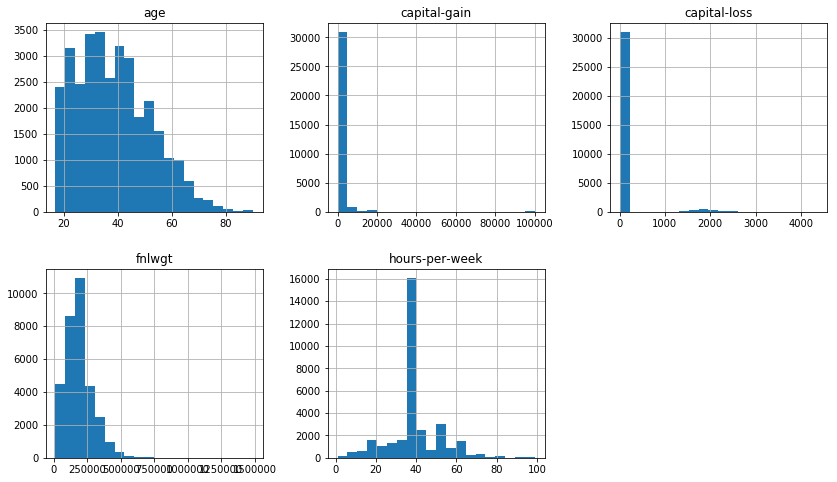

In [61]:
df[continuous_fields].hist(bins=20, layout=(2, 3), figsize=(14, 8))
plt.show()

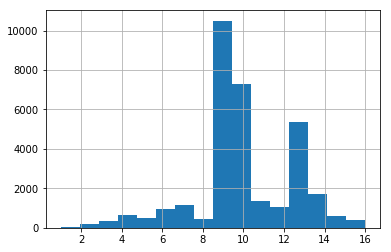

In [62]:
df['education-num'].hist(bins=16, figsize=(6, 4))
plt.show()

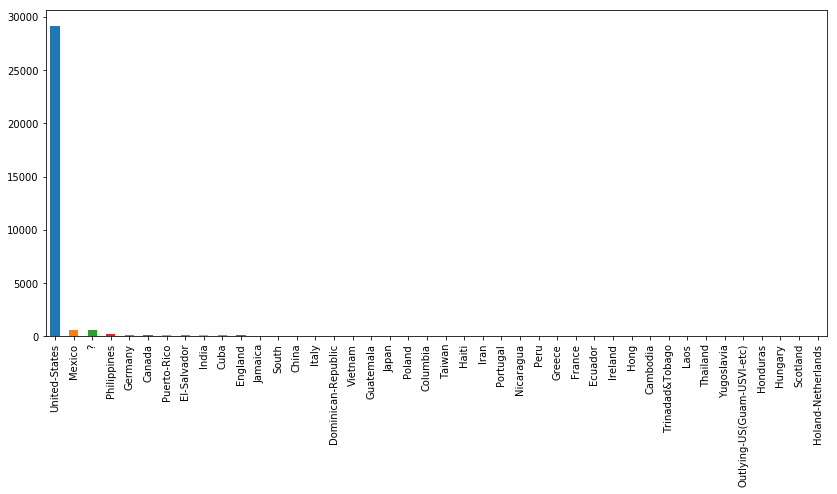

In [63]:
df['native-country'].value_counts().plot(kind='bar', figsize=(14, 6))
plt.show()

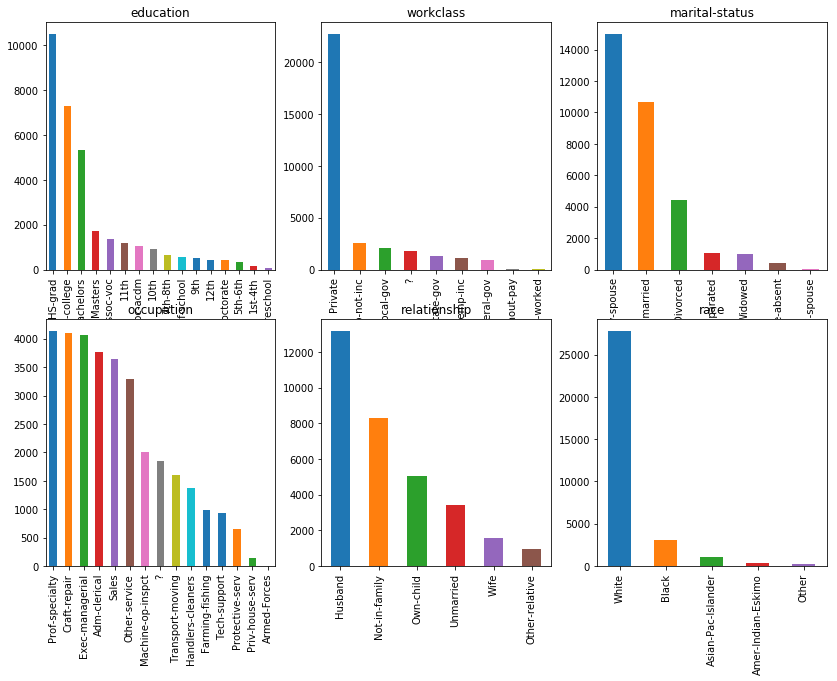

In [64]:
categorical_fields = ['education', 'workclass', 'marital-status', 'occupation', 'relationship', 'race']

n_cols = 3

fig, ax = plt.subplots(nrows=2, ncols=n_cols, figsize=(14, 10))

for i, field in enumerate(df[categorical_fields]):
    row = i // n_cols
    col = i % n_cols
    df[field].value_counts().plot("bar", ax=ax[row, col]).set_title(field)
    
plt.show()

### 16. Merge rare values of nominal fields
Let's call values ***rare***, if their relative frequency is **under 1%**. Merge rare values into one. Let's call this value `'OTHER'`. Note that if there is only one rare value, merging is useless. If there are only few rare values, merging does not give much advantage. 

In [73]:
rel_freq_dict = make_rel_freq_dict(df, column='native-country')

{k: v for k, v in rel_freq_dict.items() if v > 0.005}

{'?': 0.0179048555019809,
 'Mexico': 0.019747550750898315,
 'Philippines': 0.006080894321427475,
 'United-States': 0.895857006848684}

### 17. Inspect dependent fields
Look at the fields `'education'` and `'education-number'`. Make `set` of all observed pairs and see whether these fields are dependent. If so, be sure to drop one of them.

### 18. Scale continuous and ordinal fields
Remember, that standardization is used for continuous values, and normalization - for ordinal ones.  

The following docs may appear useful:  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.min.html  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.max.html  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.std.html

### 19. Validate scaling
*Hint*: normalized values must be in range \[0, 1\], but standardized ones must have mean equal to 0 and standard deviation equal to 1.

### 20. Make dummies for binary and nominal fields

### 21. Binarize target variable

In [ ]:
# отбор численных признаков (но не категориальных!) и вывод описательной статистики (DataFrame.describe())
df.describe()

In [ ]:
# поле 'condition' содержит общую оценку состояния. сколько домов в каждой группе? (+ график matplotplib.pyplot.bar())

In [ ]:
# некоторые дома расположены на берегу 'waterfront' == 1; каково соотношение домов на берегу и не на берегу в каждой группе?
# (+ спаренный график matplotplib.pyplot.bar())

In [ ]:
# тот же график, но на нормализованных данных (отображение не количества, а доли домов)

In [ ]:
# каковы среедние значения всех численных признаков в каждой группе по 'condition'?

In [ ]:
# каковы медианные значения?

In [ ]:
# каков разброс цен в каждой группе? (среднее квадратическое отклонение, standard deviation)

In [ ]:
# какие численные характеристики имеют значительную корреляцию друг с другом?
# см. коэффициент парной корреляции Пирсона, DataFrame.corr()

In [ ]:
# визуализация корреляционной матрицы (seaborn.heatmap())